# 1. Steven's law

In [21]:
import matplotlib.pyplot as plt
import numpy as np

In [22]:
def steven_law(Is, a):
    Ip=[]
    for i in Is: 
        Ip.append(10*i**a)
    return Ip

Obtenemos los datos generados según la ley de stevens a partir del rango de intensidades del 1 al 10. 
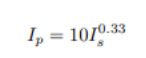

In [27]:
Is=range(1,11)
a1=0.33
Ip_steven=steven_law(Is,a1)

# 2. Fit Fetchner law with a=0.33

El objetivo es poder hacer un fit de la ley de Fechner

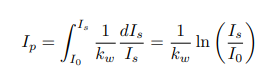

El truco consiste en darse que esta función es linear respecto al log de Is

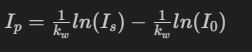

De esta manera, podemos realizar una regresión lineal simple respecto a ln(Is), por lo que 

$ a=\frac{1}{k} $ y $ b=a*\ln(Io) $

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
# Crear un objeto de regresión lineal
regression = LinearRegression()
Is_log=np.log(Is)
# Ajustar el modelo a tus datos
regression.fit(Is_log.reshape(-1, 1), Ip_steven)
a = regression.coef_[0]
b = regression.intercept_

kw=1/a
I0=np.exp(-b*kw)

print(f"Coef 'kw': {kw:.5f}")
print(f"Coeficiente 'I0': {I0:.5f}")


Coef 'kw': 0.19981
Coeficiente 'I0': 0.15560


C:\Users\Usuario\AppData\Local\Temp\ipykernel_12476\3435130689.py:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(x, a*np.log(x)+b, color="green", label="Fit Fechner")


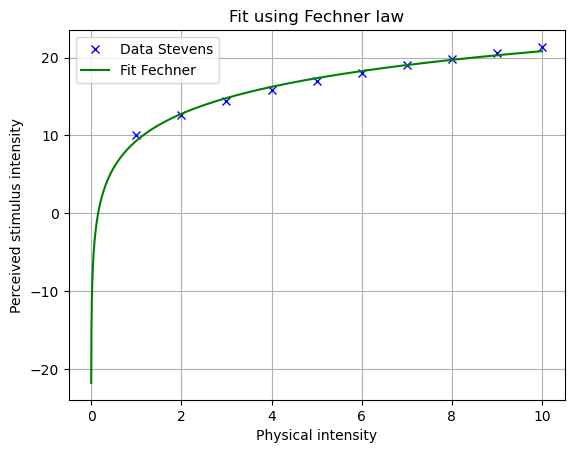

In [26]:
plt.figure()
plt.plot(Is, Ip_steven, 'x', color="blue", label="Data Stevens")
x=np.linspace(0, 10, 5000)
plt.plot(x, a*np.log(x)+b, color="green", label="Fit Fechner")
plt.title("Fit using Fechner law")
plt.xlabel("Physical intensity")
plt.ylabel("Perceived stimulus intensity")
plt.grid()
plt.legend()

#### Conclusion: 
Visually, we can state that the fit is nice and close to the data

# 3. Fechner law for a= 3.3 > 1

In [28]:
a2=3.33
Ip_steven=steven_law(Is,a2)

In [29]:
# Crear un objeto de regresión lineal
regression = LinearRegression()
Is_log=np.log(Is)
# Ajustar el modelo a tus datos
regression.fit(Is_log.reshape(-1, 1), Ip_steven)
a = regression.coef_[0]
b = regression.intercept_

kw=1/a
I0=np.exp(-b*kw)

print(f"Coef 'kw': {kw:.5f}")
print(f"Coeficiente 'I0': {I0:.5f}")

Coef 'kw': 0.00013
Coeficiente 'I0': 2.04185


C:\Users\Usuario\AppData\Local\Temp\ipykernel_12476\3435130689.py:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(x, a*np.log(x)+b, color="green", label="Fit Fechner")


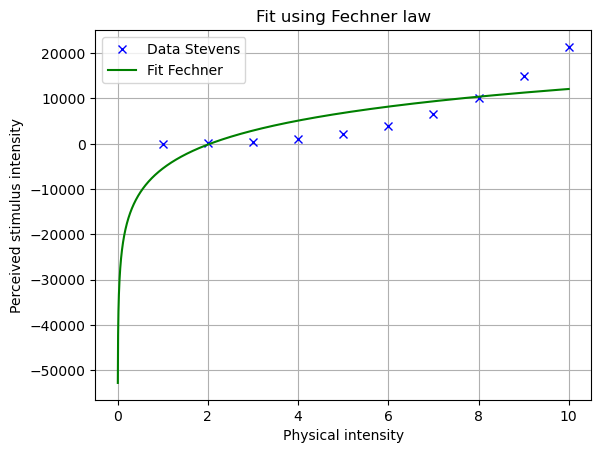

In [30]:
plt.figure()
plt.plot(Is, Ip_steven, 'x', color="blue", label="Data Stevens")
x=np.linspace(0, 10, 5000)
plt.plot(x, a*np.log(x)+b, color="green", label="Fit Fechner")
plt.title("Fit using Fechner law")
plt.xlabel("Physical intensity")
plt.ylabel("Perceived stimulus intensity")
plt.grid()
plt.legend()

#### Conclusion: 
Now the fit is much worse. Therefore, Fechner law can be fitted only to Stevens when a<1